In [2]:
# Install the required packages
%pip install numpy matplotlib scikit-learn pandas



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml

In [ ]:
# Fetch mnist dataset
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

# Normalize the pixel values
x = x / 255

# Get 10% sample of the dataset
indicies = np.random.choice(len(x), int(len(x) * 0.1), replace=False)
subset_x = x.iloc[indicies]
subset_y = y.iloc[indicies]

In [6]:

from sklearn.neighbors import KNeighborsClassifier

def bootstrap_knn_accuracy(x, y, k_values, bootstrap_iterations):
    mean_results = {}

    for k in k_values:
        # knn model with k-neighbours
        knn = KNeighborsClassifier(n_neighbors=k)
        # result of accuracy testing
        accuracies = []

        # bootstrap resampling
        for _ in range(bootstrap_iterations):
            # sample subset with a possibility of repeatition
            indices = np.random.choice(len(x), len(x), replace=True)

            x_subset = x.iloc[indices]
            y_subset = y.iloc[indices]

            # Out of bag samples
            oob_indicies = np.ones(len(x), dtype=bool)
            oob_indicies[indices] = False
            x_oob, y_oob = x[oob_indicies], y[oob_indicies]

            # train the model and save the accuracy
            knn.fit(x_subset, y_subset)
            accuracy_score = knn.score(x_oob, y_oob)
            accuracies.append(accuracy_score)
        
        mean_results[k] = np.mean(accuracies)
    return mean_results

In [7]:
# Testing parameters
k_values = range(1,11)
bootstrap_iterations = [1, 3, 6, 10]

# results dictionary
iteration_results = {}


for iter in bootstrap_iterations:
    print(f"Testing bootstrap iteration count: {iter}")
    test_result = bootstrap_knn_accuracy(subset_x, subset_y, k_values, iter)
    iteration_results[iter] = test_result


Testing bootstrap iteration count: 1
Testing bootstrap iteration count: 3
Testing bootstrap iteration count: 6
Testing bootstrap iteration count: 10


In [ ]:
# Mean accuracy per k
mean_accuracy_per_k = {}

for iters, results in iteration_results.items():
    for k, accuracy in results.items():
        if k in mean_accuracy_per_k:
            mean_accuracy_per_k[k] += accuracy
        else:
            mean_accuracy_per_k[k] = accuracy

# Divide by number of test runs
for k in k_values:
    mean_accuracy_per_k[k] /= len(bootstrap_iterations)

mean_accuracy_per_k

{1: np.float64(0.9357950216642008),
 2: np.float64(0.926043299305768),
 3: np.float64(0.9296131377775383),
 4: np.float64(0.921988502591484),
 5: np.float64(0.9252200690252114),
 6: np.float64(0.9236938090150681),
 7: np.float64(0.9293143057102101),
 8: np.float64(0.9259598371987371),
 9: np.float64(0.9246394961297072),
 10: np.float64(0.9259485956318185)}

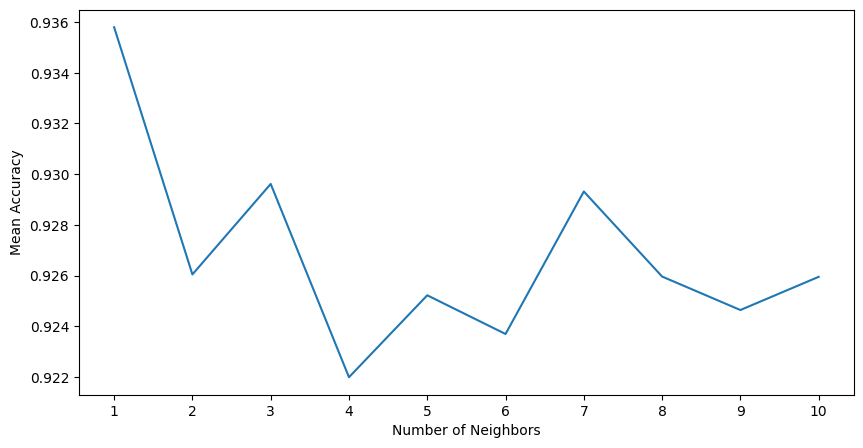

In [9]:
# Plot the mean accuracy for each value of k
plt.figure(figsize=(10,5))
plt.plot(mean_accuracy_per_k.keys(), mean_accuracy_per_k.values(), label="Mean accuracy per k parameter")
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Accuracy")

plt.xticks(range(min(mean_accuracy_per_k.keys()), max(mean_accuracy_per_k.keys()) + 1))

plt.show()

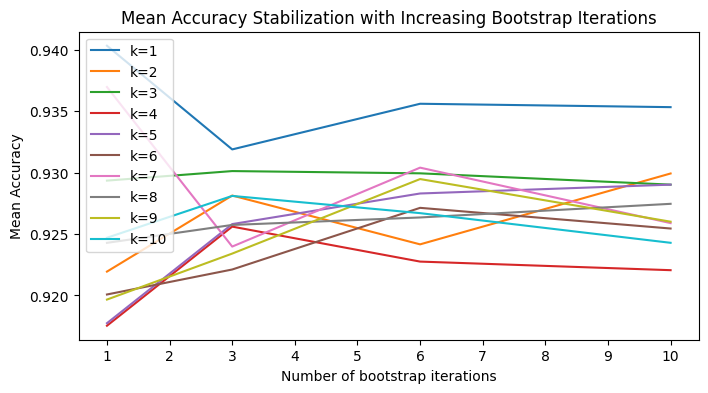

In [12]:
# Plot the accuracy stabilization
plt.figure(figsize=(8, 4))

for k in k_values:
    accuracies = [results[k] for results in iteration_results.values()]
    plt.plot(bootstrap_iterations, accuracies, label=f'k={k}')

plt.title("Mean Accuracy Stabilization with Increasing Bootstrap Iterations")
plt.xlabel("Number of bootstrap iterations")
plt.ylabel("Mean Accuracy")
plt.xticks(range(min(bootstrap_iterations), max(bootstrap_iterations) + 1))

plt.legend()
plt.show()

